<a href="https://colab.research.google.com/github/krishnasrivaibhav2027/First-contribution/blob/main/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import KFold
import regex as re

In [171]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [319]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [320]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [322]:
df1.dropna(axis=0,inplace=True)

In [323]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [324]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [325]:
df2.dropna(axis=0,inplace=True)

In [326]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [327]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB


In [328]:
#for training set lets obtain the cat_cols and num_cols and check for the number of unique values present in each cols
cat_cols=df1.select_dtypes('object').columns
for i in cat_cols:
  print(f"{i}:{df1[i].nunique()} uniqueness variables")
print(' ')
num_cols=df1.select_dtypes([np.number]).columns
for i in num_cols:
  print(f"{i}:{df1[i].nunique()} uniqueness varibles")

Name:183 uniqueness variables
Sex:2 uniqueness variables
Ticket:127 uniqueness variables
Cabin:133 uniqueness variables
Embarked:3 uniqueness variables
 
PassengerId:183 uniqueness varibles
Survived:2 uniqueness varibles
Pclass:3 uniqueness varibles
Age:63 uniqueness varibles
SibSp:4 uniqueness varibles
Parch:4 uniqueness varibles
Fare:93 uniqueness varibles


In [329]:
#now lets check for the testing set
cat_cols1=df2.select_dtypes('object').columns
for i in cat_cols1:
  print(f"{i}:{df2[i].nunique()} uniqueness variables")
print(' ')
num_cols1=df2.select_dtypes([np.number]).columns
for i in num_cols1:
  print(f"{i}:{df2[i].nunique()} uniqueness variables")


Name:87 uniqueness variables
Sex:2 uniqueness variables
Ticket:66 uniqueness variables
Cabin:72 uniqueness variables
Embarked:3 uniqueness variables
 
PassengerId:87 uniqueness variables
Pclass:3 uniqueness variables
Age:46 uniqueness variables
SibSp:4 uniqueness variables
Parch:5 uniqueness variables
Fare:58 uniqueness variables


In [330]:
df1['Name']=df1['Name'].str.split(',').str[0]

In [331]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,McCarthy,male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,Sandstrom,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,Bonnell,female,58.0,0,0,113783,26.5500,C103,S


In [332]:
df2['Name']=df2['Name'].str.split(',').str[0]

In [333]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,Snyder,female,23.0,1,0,21228,82.2667,B45,S
14,906,1,Chaffee,female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,Ryerson,female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,Ostby,female,22.0,0,1,113509,61.9792,B36,C
28,920,1,Brady,male,41.0,0,0,113054,30.5000,A21,S


In [334]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,183.0,455.366120,247.052476,2.00,263.5,457.0,676.0,890.0000
Survived,183.0,0.672131,0.470725,0.00,0.0,1.0,1.0,1.0000
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0,3.0000
Age,183.0,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0000
SibSp,183.0,0.464481,0.644159,0.00,0.0,0.0,1.0,3.0000
Parch,183.0,0.475410,0.754617,0.00,0.0,0.0,1.0,4.0000
Fare,183.0,78.682469,76.347843,0.00,29.7,57.0,90.0,512.3292


In [335]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,87.0,1102.712644,126.751901,904.0,986.0000,1094.0000,1216.00000,1306.0000
Pclass,87.0,1.137931,0.435954,1.0,1.0000,1.0000,1.00000,3.0000
Age,87.0,39.247126,15.218730,1.0,27.0000,39.0000,50.00000,76.0000
SibSp,87.0,0.597701,0.637214,0.0,0.0000,1.0000,1.00000,3.0000
Parch,87.0,0.482759,0.860801,0.0,0.0000,0.0000,1.00000,4.0000
Fare,87.0,98.109198,88.177319,0.0,35.3396,71.2833,135.06665,512.3292


In [336]:
#let's write some function to check and removing the outliers
def outlier_check(data):
  fig,ax=plt.subplots(figsize=(18,18))
  ax.boxplot(data[num_cols].values)
  ax.set_xticklabels(data[num_cols].columns)
  plt.show()


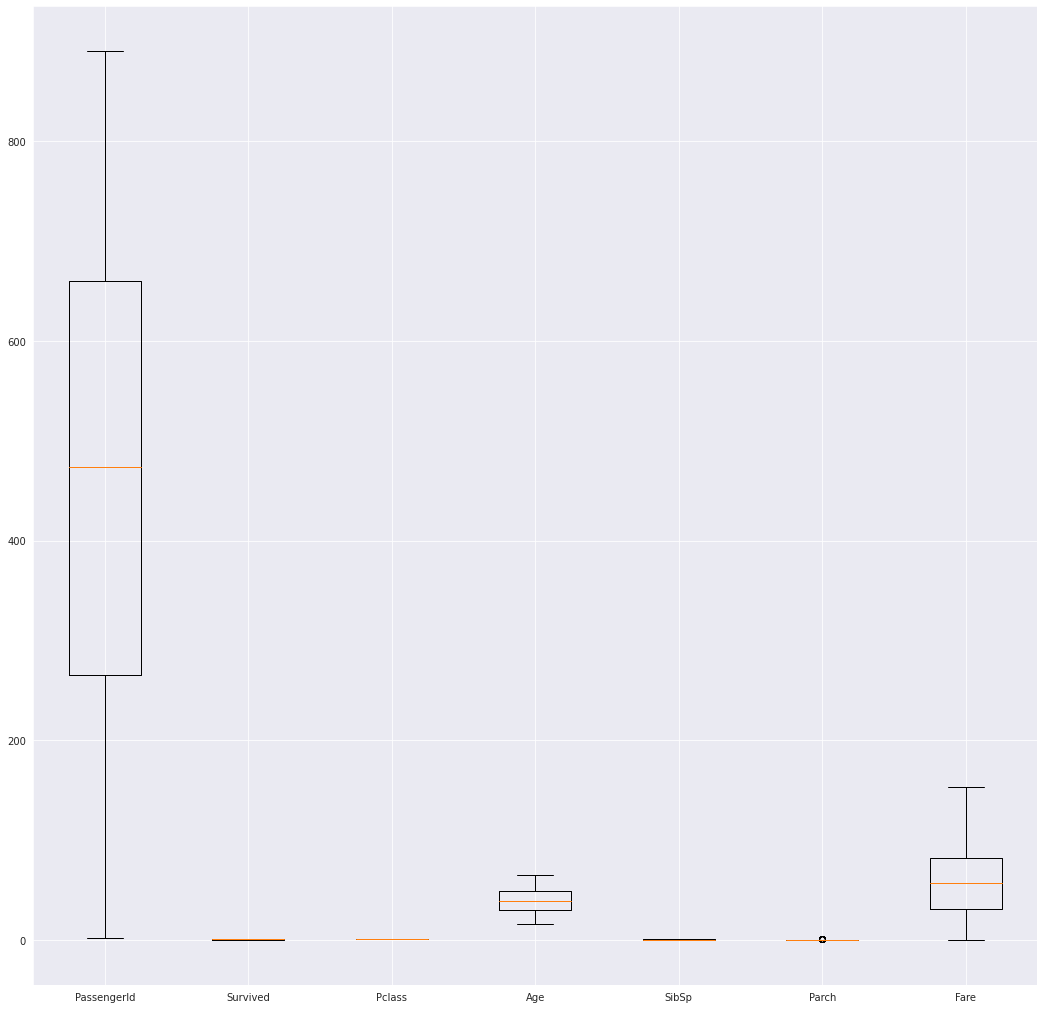

In [341]:
outlier_check(df1)

In [340]:
z=np.abs(zscore(df1[num_cols]))
df1=df1[(z<2).all(axis=1)]

In [342]:
def outlier_check1(data):
  fig,ax=plt.subplots(figsize=(18,18))
  ax.boxplot(data[num_cols1].values)
  ax.set_xticklabels(data[num_cols1].columns)
  plt.show()

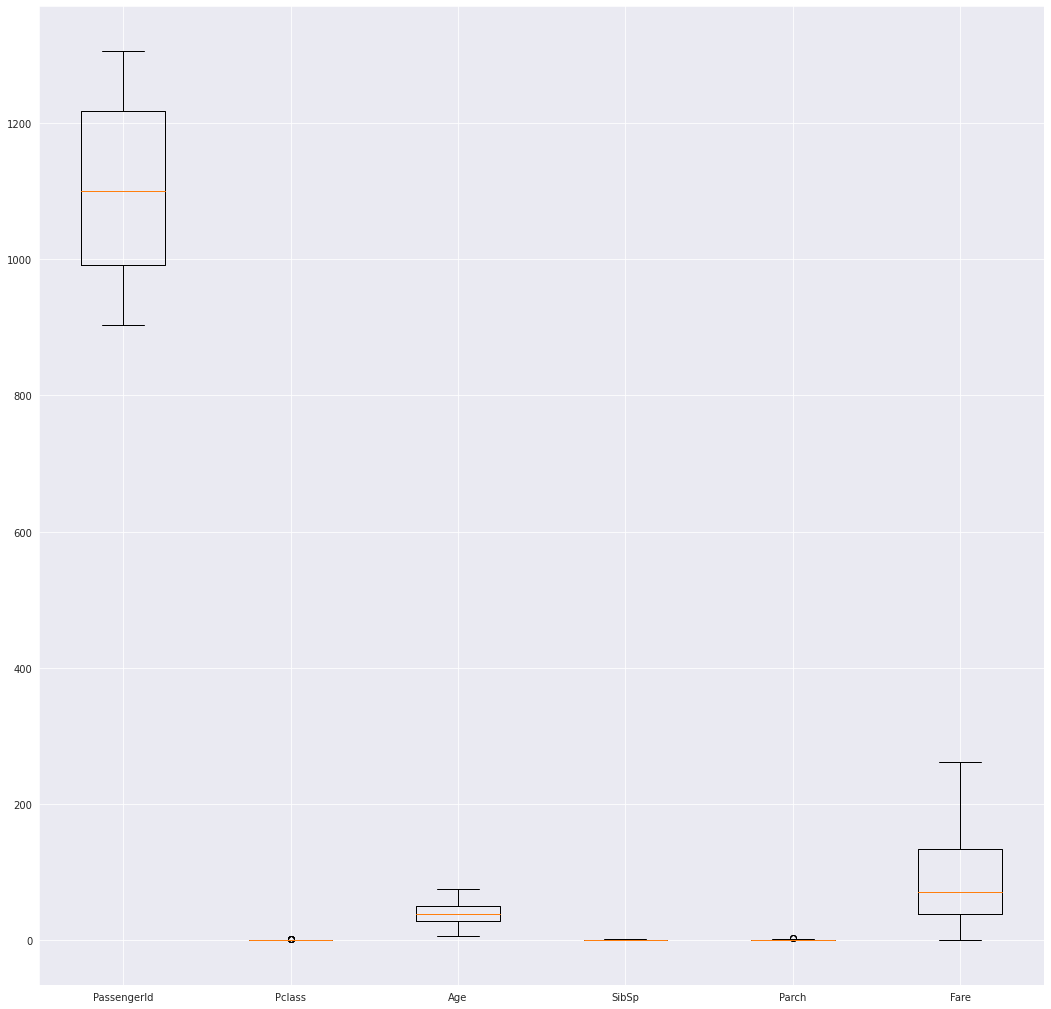

In [345]:
outlier_check1(df2)

In [344]:
z1=np.abs(zscore(df2[num_cols1]))
df2=df2[(z1<3).all(axis=1)]

In [346]:
#checking for the correltion between the features
#first let's check for the training set
#let's define a function for it
def cor_check(data):
  sns.set_style('darkgrid')
  plt.figure(figsize=(15,10))
  sns.heatmap(data.corr(),annot=True)
  plt.title('Training and testing set correlation',weight='bold',fontsize='30')
  plt.xticks(weight='bold',fontsize=15)
  plt.yticks(weight='bold',fontsize=15)

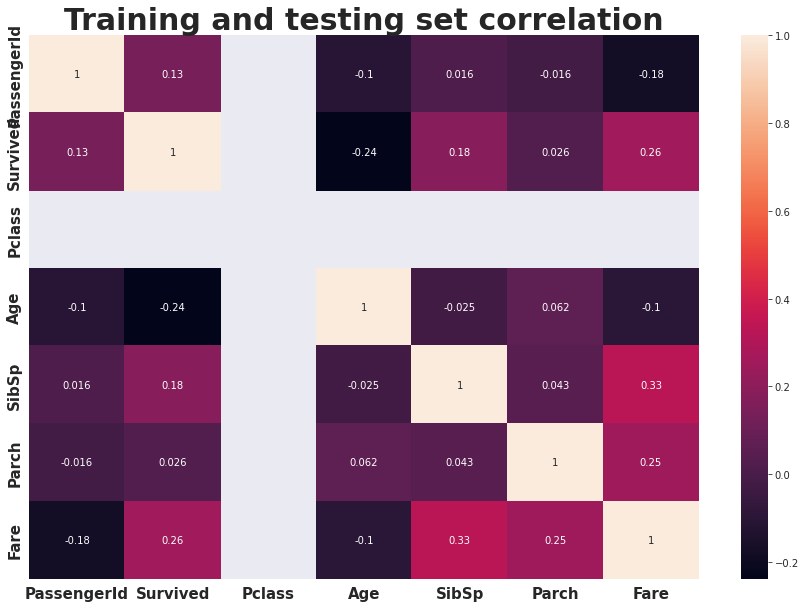

In [347]:
cor_check(df1)

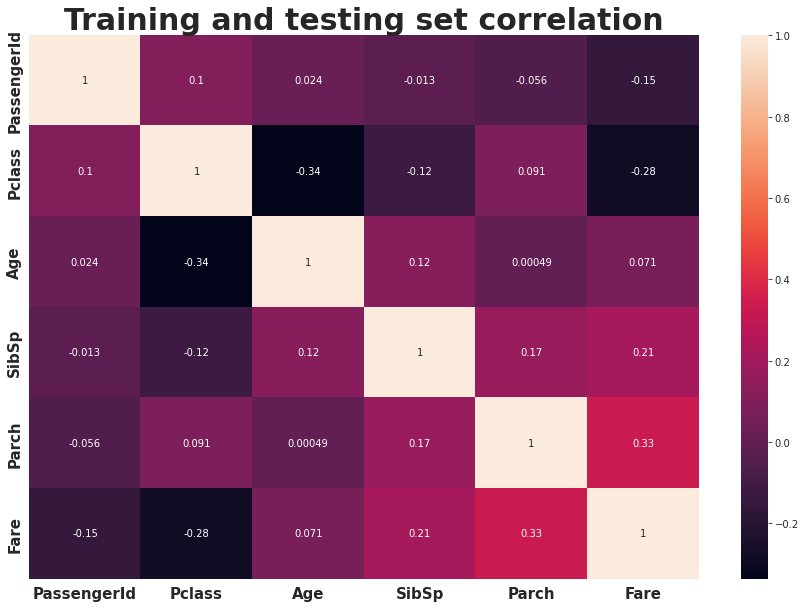

In [348]:
cor_check(df2)

In [349]:
#defining another function to drop the highly correlated features
corr_matrix=df1.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop=[col for col in upper.columns if any(upper[col]>0.95)]
df1.drop(df1[to_drop],axis=1,inplace=True)

In [350]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  122 non-null    int64  
 1   Survived     122 non-null    int64  
 2   Pclass       122 non-null    int64  
 3   Name         122 non-null    object 
 4   Sex          122 non-null    object 
 5   Age          122 non-null    float64
 6   SibSp        122 non-null    int64  
 7   Parch        122 non-null    int64  
 8   Ticket       122 non-null    object 
 9   Fare         122 non-null    float64
 10  Cabin        122 non-null    object 
 11  Embarked     122 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 12.4+ KB


In [351]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  81 non-null     int64  
 1   Pclass       81 non-null     int64  
 2   Name         81 non-null     object 
 3   Sex          81 non-null     object 
 4   Age          81 non-null     float64
 5   SibSp        81 non-null     int64  
 6   Parch        81 non-null     int64  
 7   Ticket       81 non-null     object 
 8   Fare         81 non-null     float64
 9   Cabin        81 non-null     object 
 10  Embarked     81 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 7.6+ KB


In [352]:
df1['Ticket']=df1['Ticket'].apply(lambda x: int(re.search(r'\d+',x).group()))

In [353]:
df2['Ticket']=df2['Ticket'].apply(lambda x: int(re.search(r'\d+',x).group()))

In [354]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings,female,38.0,1,0,17599,71.2833,C85,C
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,McCarthy,male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,Bonnell,female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,Sloper,male,28.0,0,0,113788,35.5000,A6,S


In [355]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,Snyder,female,23.0,1,0,21228,82.2667,B45,S
14,906,1,Chaffee,female,47.0,1,0,5734,61.1750,E31,S
24,916,1,Ryerson,female,48.0,1,3,17608,262.3750,B57 B59 B63 B66,C
26,918,1,Ostby,female,22.0,0,1,113509,61.9792,B36,C
28,920,1,Brady,male,41.0,0,0,113054,30.5000,A21,S


In [356]:
cat_cols=df1.select_dtypes('object').columns
print(cat_cols)

Index(['Name', 'Sex', 'Cabin', 'Embarked'], dtype='object')


In [357]:
l=LabelEncoder()
for i in cat_cols:
  df1[i]=l.fit_transform(df1[i])

In [358]:
cat_cols1=df2.select_dtypes('object').columns
print(cat_cols1)

Index(['Name', 'Sex', 'Cabin', 'Embarked'], dtype='object')


In [359]:
for i in cat_cols1:
  df2[i]=l.fit_transform(df2[i])

In [360]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,24,0,38.0,1,0,17599,71.2833,53,0
3,4,1,1,35,0,35.0,1,0,113803,53.1000,36,2
6,7,0,1,62,1,54.0,0,0,17463,51.8625,91,2
11,12,1,1,11,0,58.0,0,0,113783,26.5500,31,2
23,24,1,1,85,1,28.0,0,0,113788,35.5000,7,2


In [361]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,57,0,23.0,1,0,21228,82.2667,12,2
14,906,1,12,0,47.0,1,0,5734,61.1750,56,2
24,916,1,54,0,48.0,1,3,17608,262.3750,14,0
26,918,1,50,0,22.0,0,1,113509,61.9792,10,0
28,920,1,7,1,41.0,0,0,113054,30.5000,2,2


In [401]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,81.0,1106.469136,126.169934,904.0,992.0,1100.0000,1218.0,1306.000
Pclass,81.0,1.074074,0.263523,1.0,1.0,1.0000,1.0,2.000
Name,81.0,34.851852,20.274437,0.0,17.0,35.0000,54.0,67.000
Sex,81.0,0.506173,0.503077,0.0,0.0,1.0000,1.0,1.000
Age,81.0,39.722222,14.629807,6.0,28.5,39.0000,50.0,76.000
SibSp,81.0,0.580247,0.588732,0.0,0.0,1.0000,1.0,2.000
Parch,81.0,0.419753,0.772402,0.0,0.0,0.0000,1.0,3.000
Ticket,81.0,46074.555556,58828.218216,680.0,13508.0,17599.0000,36928.0,248734.000
Fare,81.0,92.167800,72.179086,0.0,39.0,71.2833,134.5,262.375
Cabin,81.0,32.617284,19.107307,0.0,16.0,33.0000,48.0,66.000


In [362]:
y_train=df1['Survived']

In [363]:
df1.drop('Survived',axis=1,inplace=True)

In [364]:
x_train=df1[:]

In [406]:
x_test=df2[:]

In [409]:
x_test['PassengerId']

12      904
14      906
24      916
26      918
28      920
       ... 
404    1296
405    1297
407    1299
411    1303
414    1306
Name: PassengerId, Length: 81, dtype: int64

In [365]:
scaler=StandardScaler()
x_train_new=scaler.fit_transform(x_train)
x_train_new=pd.DataFrame(x_train_new,columns=x_train.columns)

In [366]:
x_train_new.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,122.0,6.006125e-17,1.004124,-1.858294,-0.796735,0.045052,0.792074,1.722576
Pclass,122.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Name,122.0,8.190170e-17,1.004124,-1.707552,-0.805616,-0.058298,0.826457,1.728393
Sex,122.0,1.619834e-16,1.004124,-1.122167,-1.122167,0.891133,0.891133,0.891133
Age,122.0,9.828204e-17,1.004124,-1.841111,-0.739862,-0.031916,0.754691,2.013262
SibSp,122.0,3.822079e-17,1.004124,-0.833333,-0.833333,-0.833333,1.200000,1.200000
Parch,122.0,-1.638034e-17,1.004124,-0.469042,-0.469042,-0.469042,-0.469042,2.132007
Ticket,122.0,-4.550094e-17,1.004124,-1.048747,-0.667006,-0.661212,1.457053,1.531575
Fare,122.0,-1.274026e-16,1.004124,-1.883587,-0.949282,-0.184832,0.570141,2.692855
Cabin,122.0,1.820038e-18,1.004124,-1.769903,-0.877711,0.014481,0.800670,1.692863


In [368]:
x_test_new=scaler.fit_transform(x_test)
x_test_new=pd.DataFrame(x_test_new,columns=x_test.columns)

In [369]:
x_test_new.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,81.0,6.551686e-16,1.006231,-1.614732,-0.912914,-0.051593,0.889481,1.591299
Pclass,81.0,-3.844661e-16,1.006231,-0.282843,-0.282843,-0.282843,-0.282843,3.535534
Name,81.0,-1.384352e-16,1.006231,-1.729715,-0.885996,0.007353,0.950332,1.595529
Sex,81.0,-7.127358e-17,1.006231,-1.012423,-1.012423,0.987730,0.987730,0.987730
Age,81.0,2.921189e-17,1.006231,-2.319397,-0.771859,-0.049674,0.706900,2.495167
SibSp,81.0,-6.853229e-18,1.006231,-0.991729,-0.991729,0.717421,0.717421,2.426571
Parch,81.0,1.507710e-17,1.006231,-0.546825,-0.546825,-0.546825,0.755905,3.361363
Ticket,81.0,-1.027984e-17,1.006231,-0.776454,-0.557036,-0.487062,-0.156448,3.466400
Fare,81.0,3.255284e-17,1.006231,-1.284888,-0.741199,-0.291146,0.590143,2.372816
Cabin,81.0,-6.167906e-17,1.006231,-1.717694,-0.875101,0.020155,0.810086,1.758003


In [370]:
skew(x_train_new)

array([-0.03318162,  0.        ,  0.0295107 , -0.23103443,  0.00918166,
        0.36666667,  1.66296559,  0.7966378 ,  0.6918464 , -0.04495748,
       -0.34946911])

In [371]:
skew(x_test_new)

array([ 0.05208913,  3.25269119, -0.06982775, -0.02469324,  0.06180156,
        0.425789  ,  1.90808665,  1.94593856,  1.08967658,  0.06167109,
        0.24880207])

In [394]:
model=RandomForestClassifier()
model.fit(x_train_new,y_train)
y_pred=model.predict(x_test_new)
predict=pd.DataFrame({'Survived_pred':y_pred})
predict

,Survived_pred
0,1
1,1
2,1
3,1
4,1
...,...
76,1
77,1
78,0
79,1


In [410]:
a=x_test['PassengerId']
a

12      904
14      906
24      916
26      918
28      920
       ... 
404    1296
405    1297
407    1299
411    1303
414    1306
Name: PassengerId, Length: 81, dtype: int64

In [414]:
final=pd.concat([x_test_new['PassengerId'],predict['Survived_pred']],axis=1)
final

,PassengerId,Survived_pred
0,-1.614732,1
1,-1.598782,1
2,-1.519030,1
3,-1.503079,1
4,-1.487129,1
...,...,...
76,1.511547,1
77,1.519522,1
78,1.535472,0
79,1.567373,1


In [416]:
final.to_csv('Submission.csv',index=False)